In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.16.0-rc0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

'git' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
img_width = 64
img_height = 64

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [7]:
train_data_generator = datagen.flow_from_directory(directory="malaria-dataset",
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [8]:
validation_data_generator = datagen.flow_from_directory(directory="malaria-dataset",
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [9]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

## CNN Model Building

In [10]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

c:\Users\Viraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(train_data_generator,
                    steps_per_epoch=len(train_data_generator),
                    epochs=5,
                    validation_data=validation_data_generator,
                    validation_steps=len(validation_data_generator))


Epoch 1/5


c:\Users\Viraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1378/1378 ━━━━━━━━━━━━━━━━━━━━ 212s 152ms/step - accuracy: 0.5871 - loss: 0.6732 - val_accuracy: 0.9143 - val_loss: 0.3004
Epoch 2/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


c:\Users\Viraj\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1378/1378 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.8984 - loss: 0.2793 - val_accuracy: 0.9318 - val_loss: 0.2074
Epoch 4/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.9319 - loss: 0.2114 - val_accuracy: 0.9374 - val_loss: 0.1832


In [44]:
history.history

{'accuracy': [0.7502721548080444,
  0.0,
  0.9244375824928284,
  0.0,
  0.9320119619369507],
 'loss': [0.5127016305923462,
  0.0,
  0.2483970671892166,
  0.0,
  0.19433221220970154],
 'val_accuracy': [0.9226860404014587,
  0.0,
  0.9303085207939148,
  0.0,
  0.9337568283081055],
 'val_loss': [0.28739282488822937,
  0.0,
  0.18147248029708862,
  0.0,
  0.1939331740140915]}

In [45]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

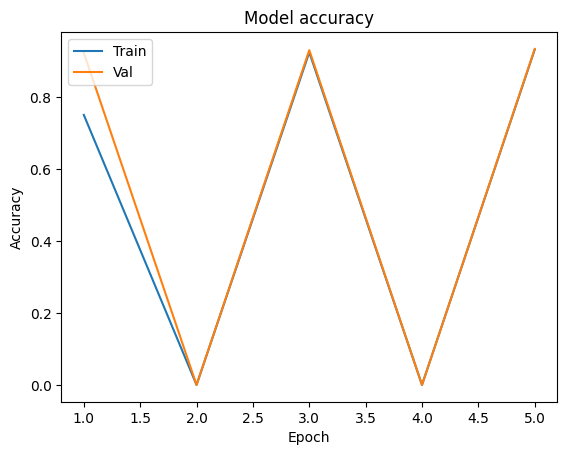

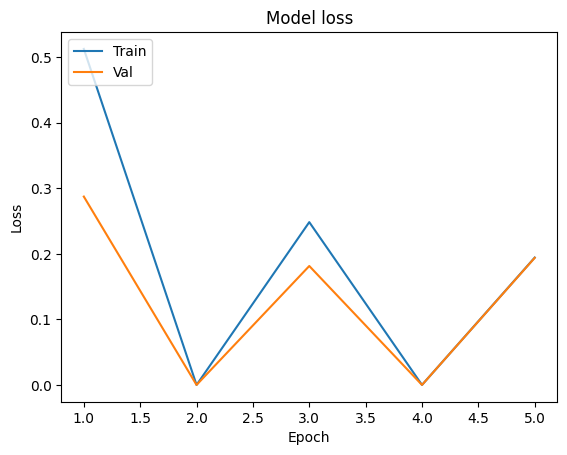

In [46]:
plot_learningCurve(history, 5)

In [14]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model1_vgg19.h5')

In [15]:

y_pred = model.predict(validation_data_generator)


345/345 ━━━━━━━━━━━━━━━━━━━━ 37s 108ms/step


In [16]:
y_pred

array([[0.9762582 ],
       [0.9536064 ],
       [0.02098188],
       ...,
       [0.0057204 ],
       [0.96180654],
       [0.9133861 ]], dtype=float32)

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
img = image.load_img("malaria-dataset\\Uninfected\\C241NThinF_IMG_20151207_124240_cell_149.png", target_size=(64,64))


In [21]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [22]:
x.shape
x = x/255.0

In [23]:
from keras.applications.vgg16 import preprocess_input
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data = np.squeeze(img_data)
img_data = img_data.reshape(-1, 64, 64, 3)

img_data.shape

(1, 64, 64, 3)

In [24]:
print(model.predict(img_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[0.7002939]]


In [25]:
a=np.argmax(model.predict(img_data), axis=1)
print(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0]


In [26]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
